# Model Training

## 1) Import Data and Required Packages

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Modelling
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Import CSV Data as DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2) Preparing X and Y Variables

In [17]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Unique Categories for Categorical Variables

In [8]:
for categorical_feature in df.select_dtypes('object').columns:
    print(f"Categories in '{categorical_feature}' variable:  {df[categorical_feature].unique()}")

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [14]:
# Create column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

# Pre Processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_tranformer = OneHotEncoder()

# Creates a object that applies tranformation to numerical and categorical together in the same dataset
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', cat_tranformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [19]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [22]:
X.shape

(1000, 19)

In [23]:
# Separate datset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
X_train.shape, X_test.shape


((800, 19), (200, 19))

### Create and Evaluate Function to Give all Metrics after Model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2 = r2_score(true, predicted)

    return mae, rmse, r2

## 3) Train and Evaluate Models

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Cat Boosting Regressor": CatBoostRegressor(silent=True),
    "Ada Boost Regressor": AdaBoostRegressor(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(">>>>>>>>", list(models.keys())[i].upper(), "<<<<<<<<")
    model_list.append(list(models.keys())[i])

    print("Model performance for training data set:")
    print(f"\t-> Mean Absolute Error: {model_train_mae:.4f}")
    print(f"\t-> Root Square Mean Error: {model_train_rmse:.4f}")
    print(f"\t-> R2 Score: {model_train_r2:.4f}")
    model_list.append(list(models.keys())[i])

    print("-----------------------------------")

    print("Model performance for test data set:")
    print(f"\t-> Mean Absolute Error: {model_test_mae:.4f}")
    print(f"\t-> Root Square Mean Error: {model_test_rmse:.4f}")
    print(f"\t-> R2 Score: {model_test_r2:.4f}")

    r2_list.append(model_test_r2.round(4))

    print("\n")

>>>>>>>> LINEAR REGRESSION <<<<<<<<
Model performance for training data set:
	-> Mean Absolute Error: 4.2523
	-> Root Square Mean Error: 2.0621
	-> R2 Score: 0.8744
-----------------------------------
Model performance for test data set:
	-> Mean Absolute Error: 4.2445
	-> Root Square Mean Error: 2.0602
	-> R2 Score: 0.8824


>>>>>>>> LASSO <<<<<<<<
Model performance for training data set:
	-> Mean Absolute Error: 5.1423
	-> Root Square Mean Error: 2.2677
	-> R2 Score: 0.8120
-----------------------------------
Model performance for test data set:
	-> Mean Absolute Error: 5.3985
	-> Root Square Mean Error: 2.3235
	-> R2 Score: 0.8084


>>>>>>>> RIDGE <<<<<<<<
Model performance for training data set:
	-> Mean Absolute Error: 4.2488
	-> Root Square Mean Error: 2.0613
	-> R2 Score: 0.8746
-----------------------------------
Model performance for test data set:
	-> Mean Absolute Error: 4.2445
	-> Root Square Mean Error: 2.0602
	-> R2 Score: 0.8824


>>>>>>>> K-NEIGHBORS REGRESSOR <<<<<<<<


## 4) Results

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.8824
2,Lasso,0.8824
7,K-Neighbors Regressor,0.8483
5,Ridge,0.8168
8,Decision Tree Regressor,0.8140
1,Linear Regression,0.8084
6,K-Neighbors Regressor,0.8055
3,Lasso,0.7719
4,Ridge,0.6686


## 5) Linear Regression


In [35]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

print(f"Model Accuracy: {score:.2f}")


Model Accuracy: 88.24


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

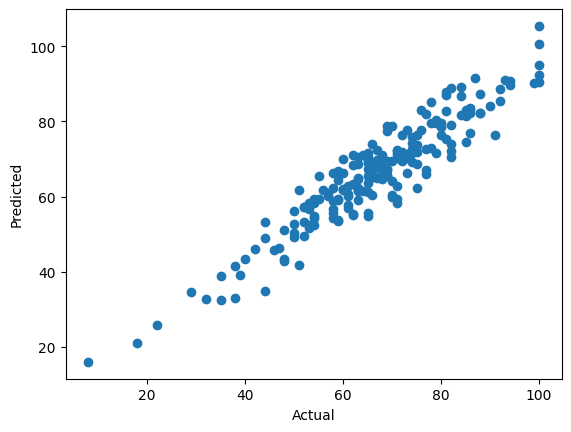

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


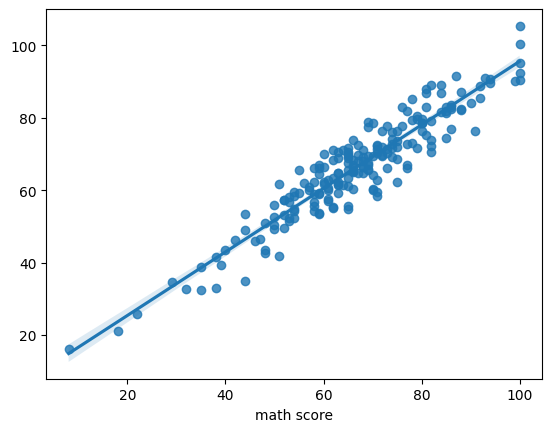

In [38]:
sns.regplot(x=y_test, y=y_pred)
plt.show()

### Difference Between Actual and Predicted Values

In [39]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual,Predicted,Difference
566,92,88.71875,3.28125
779,94,89.75000,4.25000
546,92,85.46875,6.53125
711,80,78.65625,1.34375
645,65,69.56250,-4.56250
...,...,...,...
451,100,92.40625,7.59375
675,50,56.06250,-6.06250
257,78,79.53125,-1.53125
837,75,68.65625,6.34375
